<a href="https://colab.research.google.com/github/ENV716/Energy_Modeling_F2022/blob/main/Lab/Lab12/Lab12_SimulatingRandomVariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 12 - Simulating Random Variable in Python**

In this lab we will go over random number generation in Pyhton. The specific learning outcomes are:
* Get familiar with library random and how to set the seed for random number generation;
* Simulate a coin flip and roll a die using random.randint();
* Simulate a coin flip using np.random and the binomial distribution;
* Get familiar with the library scipy.stats and its functions rvs(), cdf() and pdf() using the binomial and the continuous uniform distribution.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

Mounted at /content/drive


In [17]:
#Start by loading necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

## Simulating a Coin Flip/Toss

Imagine we have a fair coin. if we toss the coin we will observe either a head or a tail. We can code 1 for head and 0 for tail.
* Head = 1
* Tail = 0

Using the random module we have the following options:
* **random.random()** method returns a random float number between 0.0 to 1.0. The function doesn't need any argument.
* **random.randint(** *start*,*stop* **)** method returns a random *integer* between the specified integers.
* **random.randrange(** *start*,*stop*,*step* **)** method returns a randomly selected element from the range created by the start, stop and step arguments.
* **random.choice()** method returns a randomly selected element from a non-empty sequence that should be provide as an argument. 

In [3]:
#Simulate One flip
import random
random.randint(0,1)

1

In [5]:
#Simulate 10 flips
for i in range(10):
    print(random.randint(0,1)) #note flips change as you re-run cell

1
1
0
0
0
1
0
1
1
1


In [6]:
#Simulate more flips and store the simulated numbers
import numpy as np
nflips=1000
results=np.empty([nflips])
for i in range(nflips):
    results[i]=random.randint(0,1)

#If you want to know how many heads you got, you can sum the array. Remember 
#heads are represented by 1s and tail by 0s.
print("Number of Heads:",(sum(results)))
results

Number of Heads: 507.0


array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0.

## Simulate a Fair Die Throw

In [7]:
#Roll of a fair die 1000 times
nflips=1000  #change to 10000
results=np.empty([nflips])
for i in range(nflips):
    results[i]=random.randint(1,6)

results

array([6., 6., 6., 6., 4., 2., 1., 3., 4., 6., 5., 5., 3., 3., 6., 3., 2.,
       3., 2., 2., 5., 5., 1., 1., 2., 6., 4., 3., 6., 3., 1., 1., 2., 6.,
       1., 2., 5., 3., 3., 2., 2., 4., 2., 6., 2., 6., 2., 5., 6., 6., 2.,
       5., 2., 5., 1., 4., 2., 5., 1., 1., 6., 3., 3., 4., 2., 6., 2., 1.,
       2., 1., 4., 3., 6., 4., 3., 2., 4., 6., 6., 4., 3., 4., 4., 1., 1.,
       2., 4., 2., 1., 6., 2., 2., 2., 2., 5., 5., 1., 5., 2., 2., 2., 4.,
       3., 3., 6., 3., 1., 3., 1., 6., 5., 1., 3., 1., 4., 4., 5., 6., 2.,
       5., 6., 6., 5., 4., 1., 4., 4., 3., 4., 1., 2., 2., 5., 1., 1., 3.,
       3., 5., 4., 3., 2., 1., 5., 4., 1., 3., 5., 1., 1., 2., 1., 3., 2.,
       4., 6., 5., 2., 4., 4., 1., 6., 6., 2., 2., 4., 3., 2., 1., 5., 6.,
       5., 2., 4., 6., 3., 1., 2., 4., 4., 6., 5., 2., 2., 3., 2., 3., 6.,
       1., 1., 4., 3., 6., 6., 2., 5., 3., 5., 4., 6., 5., 1., 5., 2., 4.,
       4., 5., 4., 4., 5., 2., 3., 6., 5., 6., 5., 3., 6., 6., 6., 1., 1.,
       2., 4., 2., 6., 6.

If you want the number of occurence os a spefic outcome you can use numpy function *count_nonzero()*.
If you use *np.count_nonzero( array )* you are just counting number that are not zero.
But this function can also be used to count the number of times a value appears in a array by using *np.count_nonzero( array == value )*.

In [8]:
#If you want to know how many times we got number 1,
draw_one=np.count_nonzero(results == 1)
print("Number of 1s:",draw_one) 
print("Probability of getting a 1:",draw_one/nflips)
print("True probability of getting 1:", 1/6)

Number of 1s: 154
Probability of getting a 1: 0.154
True probability of getting 1: 0.16666666666666666


## Seed Number Generator

Every time you simulate the random number generator you get a diferent number. If you want all of us to get the same number you can ask our computer to use the same seed to generate the random number. You can set a seed by using function *random.seed()*.

Generating random numbers looks a lot easier than it really is. The generation of true random numbers remains an unsolved problem in computer science. If you are a Big Bang Theory fan watch episode 1 of Season 12 called "The Conjugal Configuration".  

In [ ]:
#Roll of a fair die again but now let's all use the same seed
random.seed(1112)
nflips=10  #change to 10000
results=np.empty([nflips])
for i in range(nflips):
    results[i]=random.randint(1,6)

print(results)

[3. 1. 3. 5. 1. 4. 1. 6. 5. 3.]


## Simulating Random Variables from Standard Distributions

### Binomial Distribution

The Binomial Distribution has two possible outcomes: succes and failure. It can be used to simulate a coin flip/toss.
To simulate draws from a Binomial we will use *np.random.binomial()*. This function takes two arguments:
* Number of trials;
* Probability of succes.

In [ ]:
#Binomial: only two possible outcomes, consider heads a success
import numpy as np 
nflips=10000
p=0.5 #prob of heads
n_heads=np.random.binomial(nflips,p)
print("Number of heads:",n_heads) 

Number of heads: 5080


In [ ]:
#Now let's see how to fix the seed with the numpy random number generator
np.random.seed(1112)
nflips=10000
p=0.5 #prob of heads
n_heads=np.random.binomial(nflips,p)
print("Number of heads:",n_heads) 

Number of heads: 4988


When generating random variables we might also be interested in pdfs and cdfs. The scipy.stats library offers more functionality.

* *scipy.stats.binom.rvs()* rvs stands for random variates
* *scipy.stats.binom.cdf()* cdf stands for cumulative distribution function
* *scipy.stats.binom.pdf()* pdf stands for probability density function, it can only be used for continuous variables
* *scipy.stats.binom.pmf()* pmf stands for probability mass function, it can only be used for discrete variables



In [9]:
#but if you want more than draws
import scipy.stats as stats
nflips=10000
p=0.5 #prob of heads
n_heads=stats.binom.rvs(nflips,p)
print("Number of heads:",n_heads )

Number of heads: 5040


The cumulative density function (cdf) of 500 is the cumulative probability of 500, i.e., probability that in 1000 flips we get heads less than 500 times.


In [ ]:
nflips=1000
p=0.5 #prob of heads
stats.binom.cdf(500,nflips,p)


0.5126125090888417

The probability of exactly 500 heads will be given by the pmf since the binomial is a discrete distribution. 

In [ ]:
stats.binom.pmf(500,nflips,p)

0.025225018178380496

### Discrete Uniform Distribution

Discrete uniform random number generator can be done with the 
*random.randint()* or with the *numpy.random.randint()*.

*numpy.random.randint(low, high=None, size=None, dtype='l')* will return random integers from low (inclusive) to high (exclusive), i.e., [low, high). 

In [10]:
#Discrete Uniform to simulate fair die throw with numpy
nflips=100
results=np.random.randint(1,6,size=nflips)
print(results)
draw_six=np.count_nonzero(results == 6)
print("Number of 6s:",draw_six) 
print("Probability of getting a 6:",draw_six/nflips)
print("True probability of getting 6:", 1/6)

[1 2 5 3 3 3 3 5 1 2 5 4 4 2 1 2 4 4 1 3 4 3 2 4 1 2 5 3 1 5 5 4 4 4 1 5 5
 2 2 3 1 2 5 1 3 2 5 4 4 3 2 3 3 1 3 3 5 5 2 4 2 2 3 1 5 5 2 3 3 4 2 2 4 4
 5 1 2 1 4 2 1 3 1 4 1 3 5 5 4 3 1 5 1 4 3 5 1 4 5 2]
Number of 6s: 0
Probability of getting a 6: 0.0
True probability of getting 6: 0.16666666666666666


Note that 6 never happens, we need to change the limits!


In [11]:
#Discrete Uniform to simulate fair die throw with numpy
nflips=1000
results=np.random.randint(1,7,size=nflips)
draw_six=np.count_nonzero(results == 6)
print("Number of 6s:",draw_six) 
print("Probability of getting a 6:",draw_six/nflips)
print("True probability of getting 6:", 1/6)

Number of 6s: 168
Probability of getting a 6: 0.168
True probability of getting 6: 0.16666666666666666


Increase number of flips to get closer to true probability.



### Continuous Uniform Distribution

The continuous uniform can be generated with the numpy or the scipy.stats library using the functions: 
* *np.random.uniform()* or
* *stats.uniform.rvs()*.

In [12]:
#Generate continuous Uniform(0,1) variates with numpy
nflips=10000
gen_uniform=np.random.uniform(0,1,size=nflips)
gen_uniform

array([0.08854704, 0.07312743, 0.89897786, ..., 0.70325197, 0.19762457,
       0.52788192])

If you want to check the generated values, since they are floats and 10000 simulations, it's easier to plot them than print the values. Plots can be generate in two ways.
* Convert your numpy array to a data frame using pd.DataFrame() and use .plot().
* Using *matplotlib.pyplot.plot()* function.

The second option will be the preferred method.

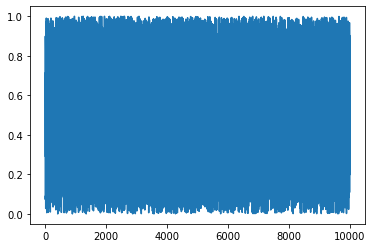

In [13]:
#Let's try option 2 
import matplotlib.pyplot as plt
plt.plot(gen_uniform)
#plt.ylim() #uncomment this line to get min and max values for the generated number

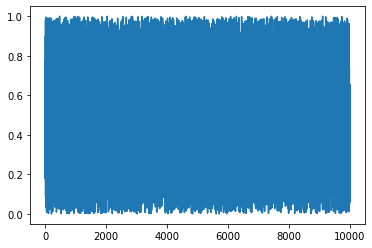

In [ ]:
#Generate Uniform(0,1) variates with scipy.stats
gen_uniform=stats.uniform.rvs(size=10000) 
plt.plot(gen_uniform)

Note that because we did not specify anything when we called *gen_uniform=stats.uniform.rvs(size=1000)* the generated random variabels are all between 0 and 1. 
If you want U(a,b) you need to change the default arguments *loc* and *scale*.

In [14]:
#Ex8: continuous Uniform distribution
nflips=10000
a=1
b=10  #Uniform(1,10)
gen_uniform=stats.uniform.rvs(size=nflips,loc=a,scale=(b-1))

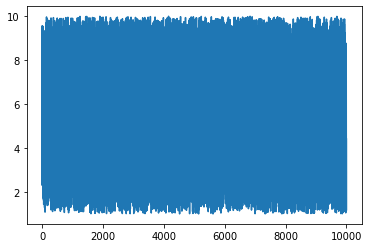

In [ ]:
#Now plot again to see the numbers have changed
plt.plot(gen_uniform)

The library scipy.stats can be used for any distribution by changing the argument that specifies the distribution
*stats.**distribution**.rvs()*, *stats.**distribution**.pdf()*,*stats.**distribution**.pmf()*,*stats.**distribution**.cdf()*. Just replace distribution with the name of distribution you want. For example:

* *stats.**norm**.rvs()*
* *stats.**expon**.rvs()*
* *stats.**gamma**.rvs()*
* ...



## **Exercise:**

Game: throw a pair of fair dice and get paid the sum multiplied by 10.

In [ ]:
#Simulate draws - discrete uniform
#YOUR CODE#

In [ ]:
#Parts d,e,f
Exp_P=np.mean(P)
Var_P=np.var(P)
Std_P=np.std(P)
print("Expected Value:",'{number:.{digits}f}'.format(number=Exp_P,digits=2))
print("Variance:",'{number:.{digits}f}'.format(number=Var_P,digits=2))
print("Standard Deviation:",'{number:.{digits}f}'.format(number=Std_P,digits=2))

In [ ]:
#Plots
plt.plot(P)
plt.figure() #start new plot
plt.hist(P,bins=50,density=True)
plt.figure() #start new plot
plt.hist(P,bins=50,cumulative=True)


## **Exercise: Empirical Distribution and the newsvendor problem**

“Empirical” means “observed”. Empirical distributions are distributions of observed data. Recall the example from lectures.

How could you use Monte Carlo simulation in Python to find the optimal ordering strategy for the newsvendor?



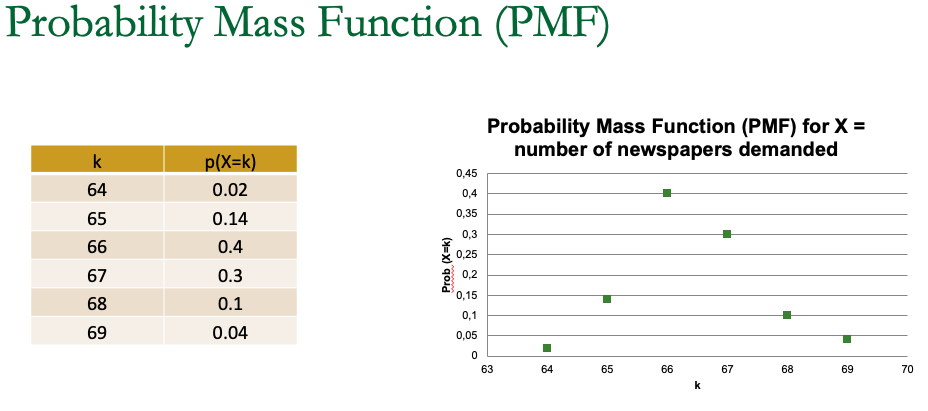

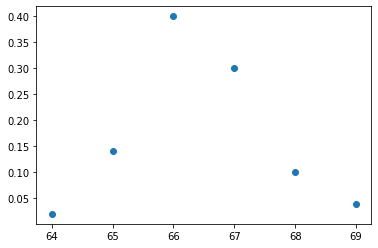

In [15]:
#How to create the pmf
revenue=1.5
cost=0.5
demand=[64,65,66,67,68,69]
demand_pmf=[0.02,0.14,0.4,0.3,0.1,0.04]

#Plot pmf
plt.scatter(demand,demand_pmf)


In [16]:
#construct cdf
demand_cdf=np.empty([len(demand)])

####YOUR CODE TO CONSTRUCT THE CDF ARRAY#####

In [ ]:
#plot cdf
plt.plot(demand,demand_cdf)

In [ ]:
#define profit function UDF
#recall x is amount sold and y is ordered

##YOUR CODE TO DEFINE A UDF THAT RETURN PROFIT###


In [ ]:
#simulate demand   
nsim=1000000
demand_draws=np.empty([nsim])
#set seed
np.random.seed(1112)
draw=stats.uniform.rvs(size=nsim,loc=0,scale=1)
for i in range(nsim):
    for j in range(len(demand)):
        if( draw[i] <= demand_cdf[j]):
            ### YOUR CODE: FILL OUT MISSING PART THAT WILL GIVE DEMAND BASED ON CDF DRAW####

In [ ]:
plt.hist(demand_draws,bins=10,density=True)

In [ ]:
#calculate gx for each draw
print("Number of draws:",nsim)
for j in range(len(demand)):
    expected_profit=0
    for i in range(nsim):
        expected_profit = ###YOUR CODE: COMPLETE THIS EXPRESSION##
    expected_profit = expected_profit/nsim
    print(demand[j],":",expected_profit)